In [95]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import ISLP
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import anova_lm 
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import statsmodels.formula.api as smf

# Question 8

In [5]:
Auto = ISLP.load_data('Auto')
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [14]:
X = pd.DataFrame({
    'intercept': np.ones(Auto.shape[0]),
    'horsepower': Auto['horsepower']
})
Y = Auto['mpg']
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           7.03e-81
Time:                        19:59:09   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 8ai)
There is a relationship between the predictor and the response because the p-value is less than our specified significance level of 0.05.

### 8aii)
$R^2$ = 0.61 so it means that the relationship between the predictor and the response is strong. We can say that 61% of the variability of the response can be explained by the predcitor.

In [25]:
results.rsquared

0.6059482578894348

### 8aiii)
The predictor is inversely related to the response because the coefficient is negative.

### 8aiv)
Predicted mpg for horsepower of 98 is 24.5

In [26]:
predict_X = pd.DataFrame({
    'intercept': [1],
    'horsepower':[98]
})
prediction = results.get_prediction(predict_X)
prediction.predicted_mean

array([24.46707715])

Confidence interval of prediction [24.0, 25.0]

In [27]:
prediction.conf_int(alpha=0.05)

array([[23.97307896, 24.96107534]])

Prediction interval of prediction [14.8, 34.1]

In [28]:
prediction.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

In [37]:
prediction.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


### 8b)

C:\Users\xavie\AppData\Local\Temp\ipykernel_99460\286218211.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0, results.params[0]), slope=results.params[1], ls='--', c='r')


Text(0, 0.5, 'MPG')

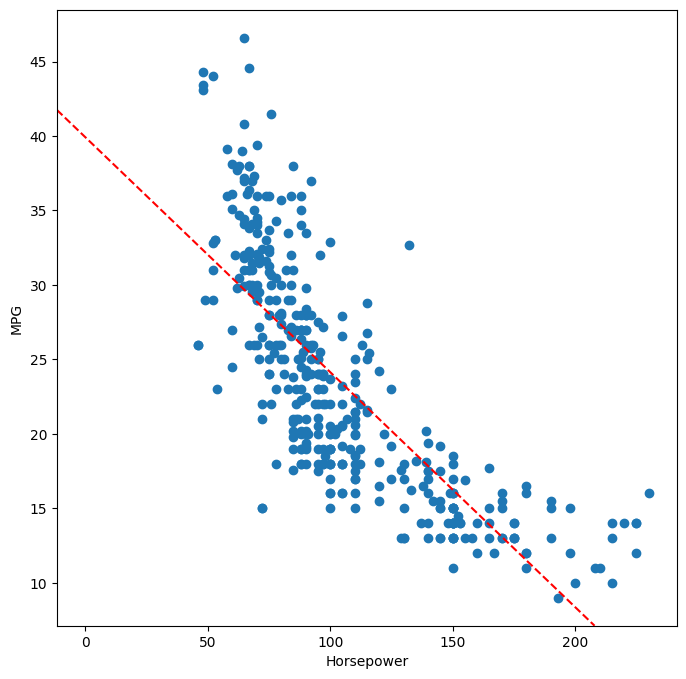

In [45]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(Auto['horsepower'], Auto['mpg'])
ax.axline((0, results.params[0]), slope=results.params[1], ls='--', c='r')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')

### 8c)
There seems to be a quadratic pattern in the residual, indicating that the relationship between the response and the predictor is probably non-linear.

Text(0.5, 1.0, 'Residual Plot')

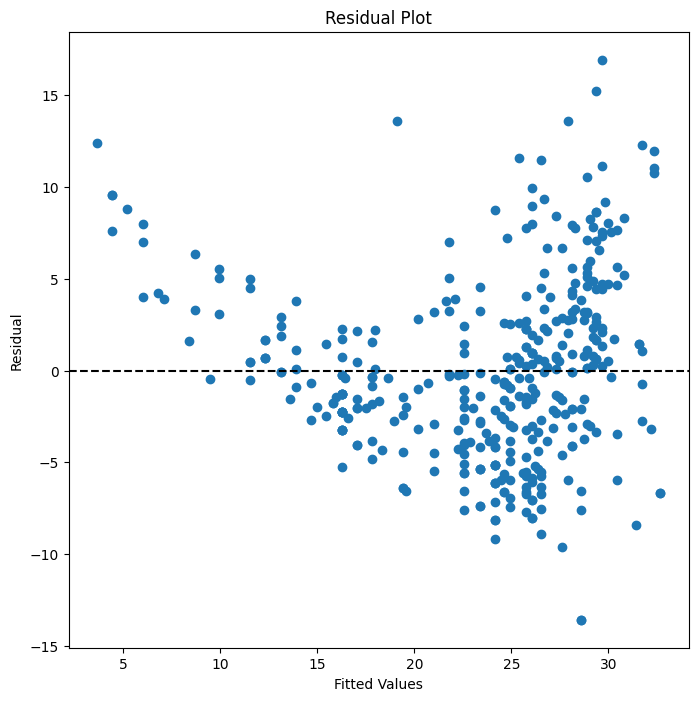

In [49]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.axhline(0, c='k', ls='--')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residual')
ax.set_title('Residual Plot')

# Question 9

In [52]:
Auto = ISLP.load_data('Auto')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


### 9a)

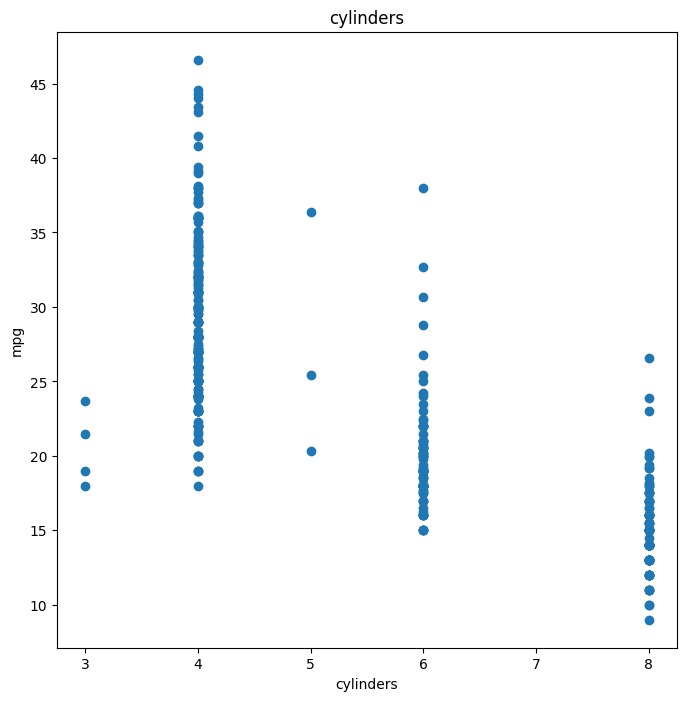

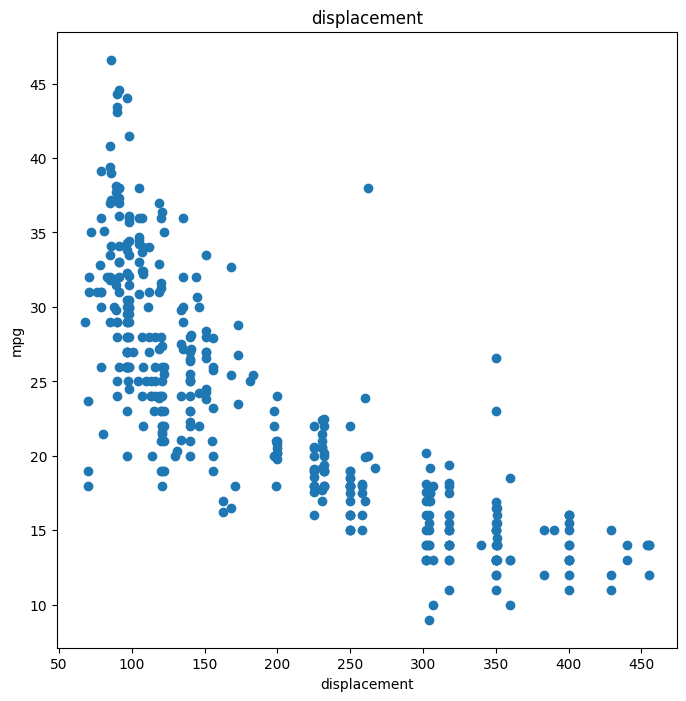

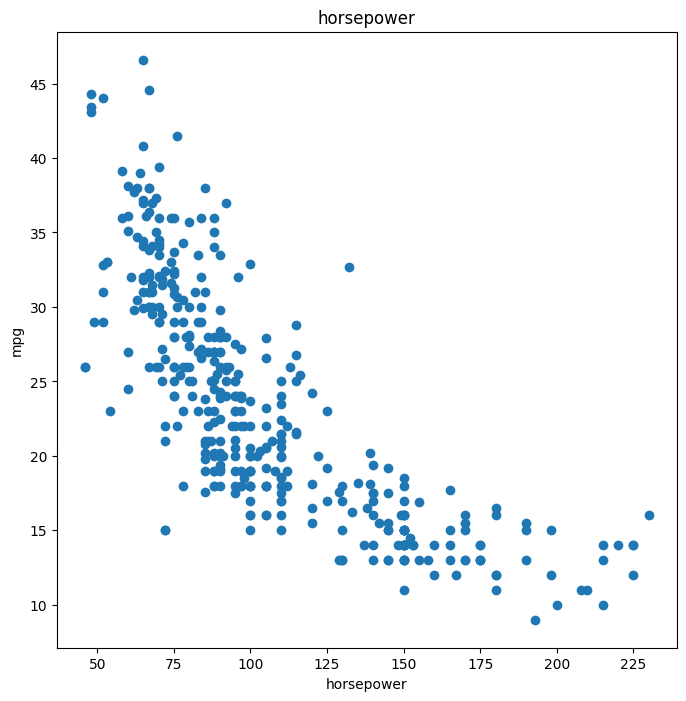

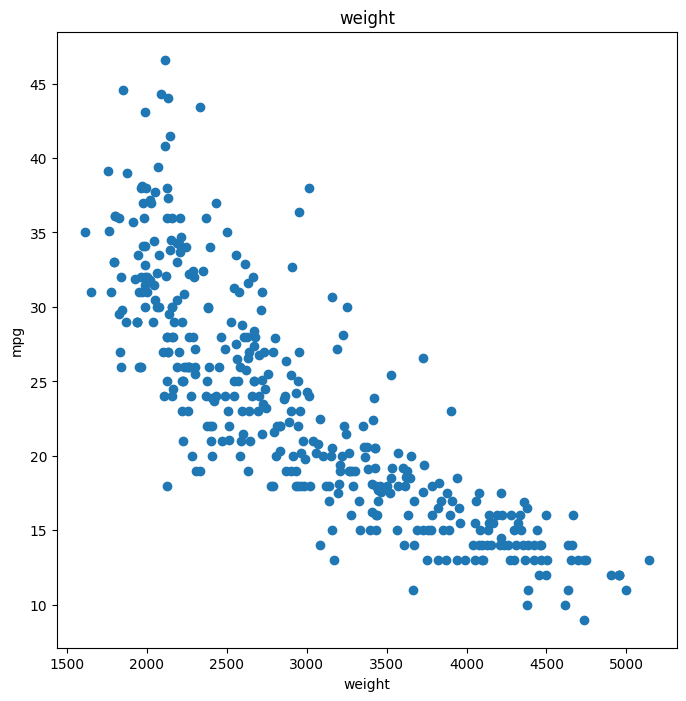

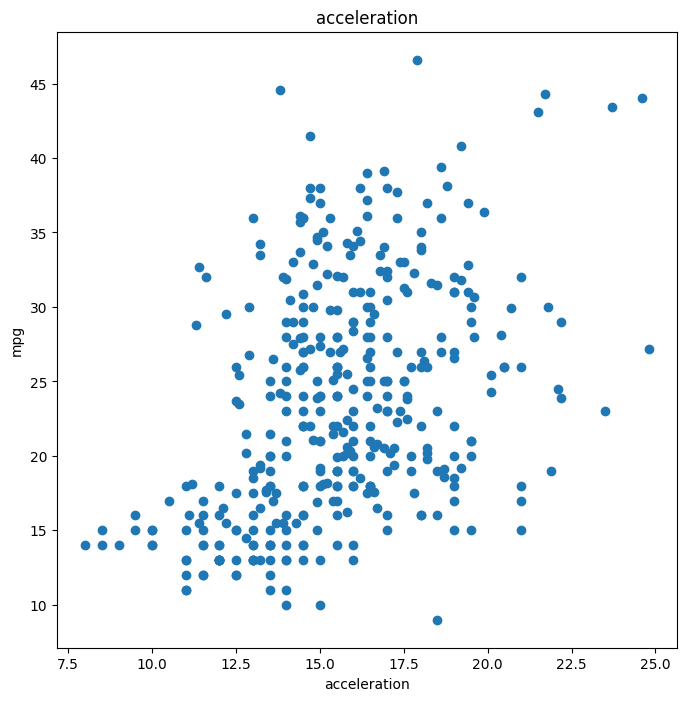

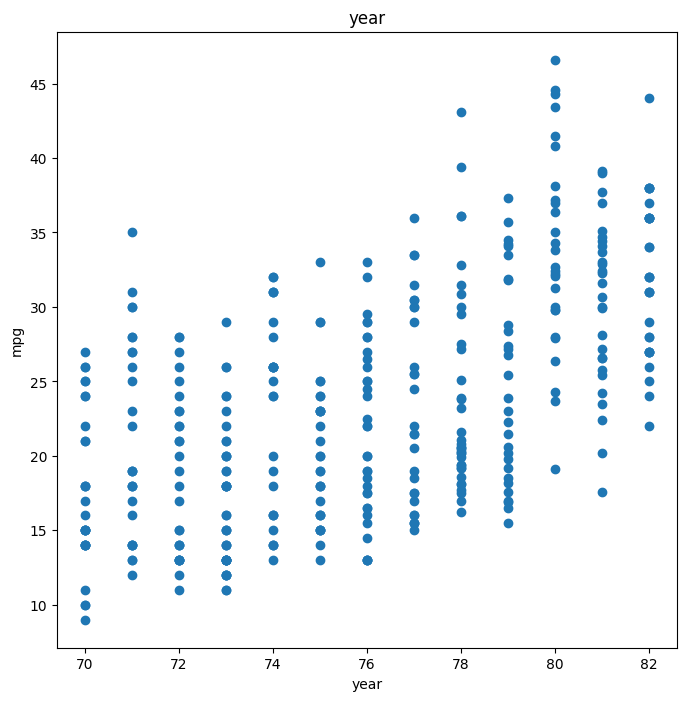

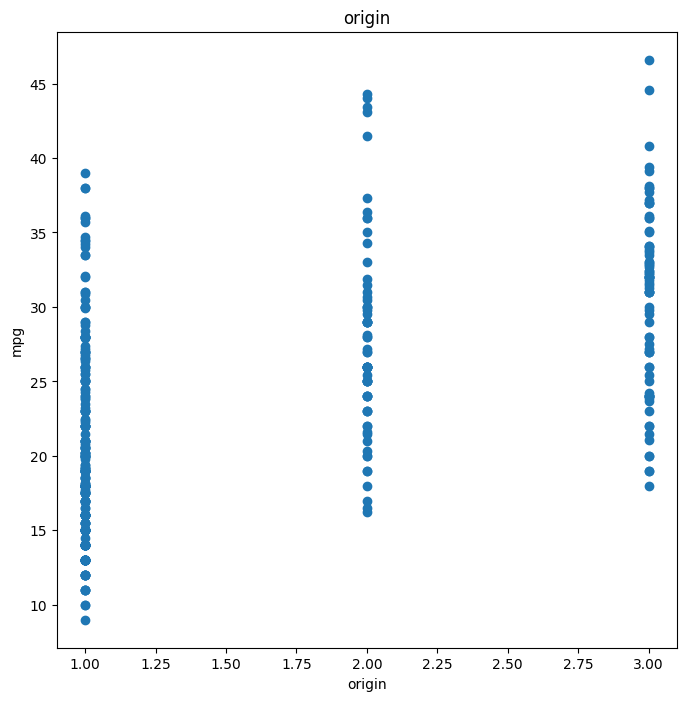

In [60]:
for col in Auto.iloc[:, 1:8].columns:
    ax = plt.subplots(figsize=(8,8))[1]
    ax.scatter(Auto[col], Auto['mpg'])
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('mpg')
    plt.show()

### 9b)

In [53]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<Axes: >

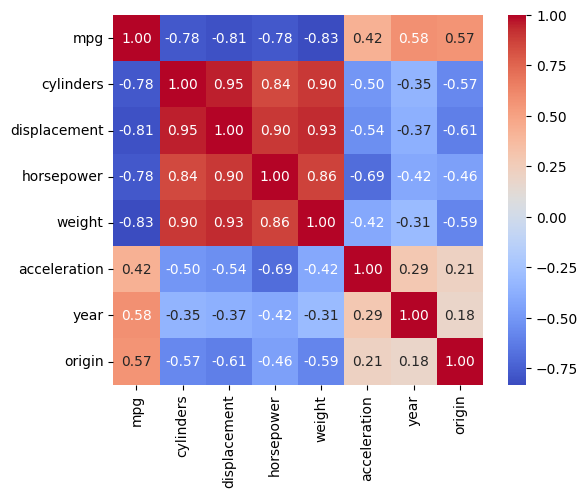

In [56]:
sns.heatmap(Auto.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

### 9ci & ii)
Just looking at the p-value, some of the predictors have a statistically significant relationship with the response except for `accleration`, `horsepower` and `cylinders`. In general, it does appear that there is a relationship between the predictors and response because the F-statistic is relatively high.

In [75]:
X = Auto.iloc[:, 1:]
X = X.reset_index(drop=True)
Y = Auto['mpg'].reset_index(drop=True)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 17 Jun 2024   Prob (F-statistic):          2.04e-139
Time:                        21:30:51   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 9 ciii)
It suggests that if we increment the year by, while keeping all other predictors constant, we should expect a 0.7508 increase in the response

### 9d)
From the residual plot, it does suggest that there is non-linear relationship between the predictors and the response.

Text(0, 0.5, 'Residual')

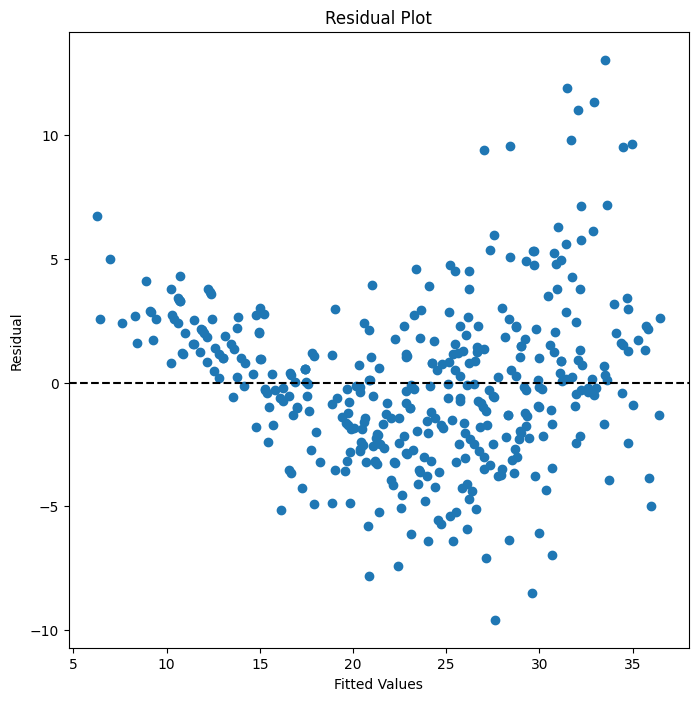

In [80]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.axhline(0, ls='--', c='k')
ax.set_title('Residual Plot')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residual')

We will use studentised residual to check if we can identify any outliers. We do have a few outliers.

Text(0, 0.5, 'Studentised Residual')

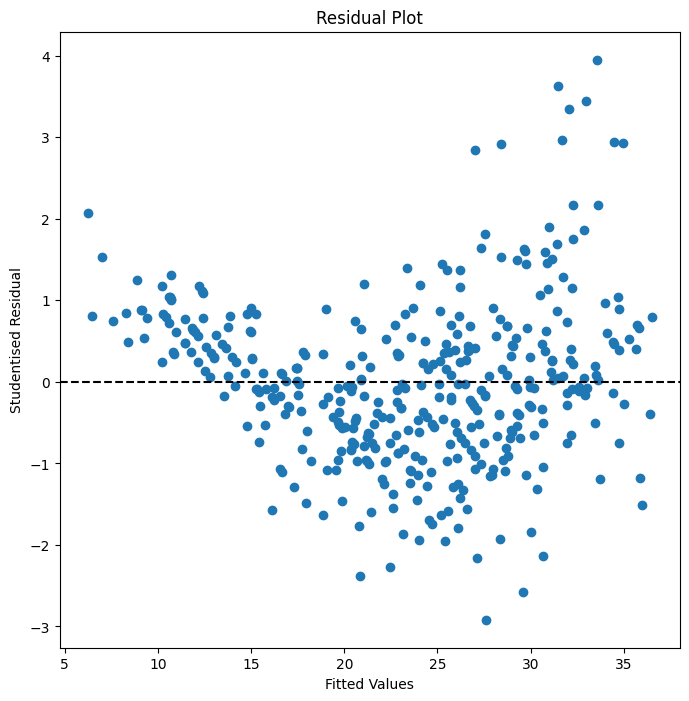

In [87]:
sturesid = results.get_influence().get_resid_studentized_external()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, sturesid)
ax.axhline(0, ls='--', c='k')
ax.set_title('Residual Plot')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Studentised Residual')

Now let's check for high leverage points. As we can see we got quite a few points of high leverage because their leverage is significantly larger than our average leverage is 0.02

0.025510204081652773
Observation number with unusually large leverage:  13


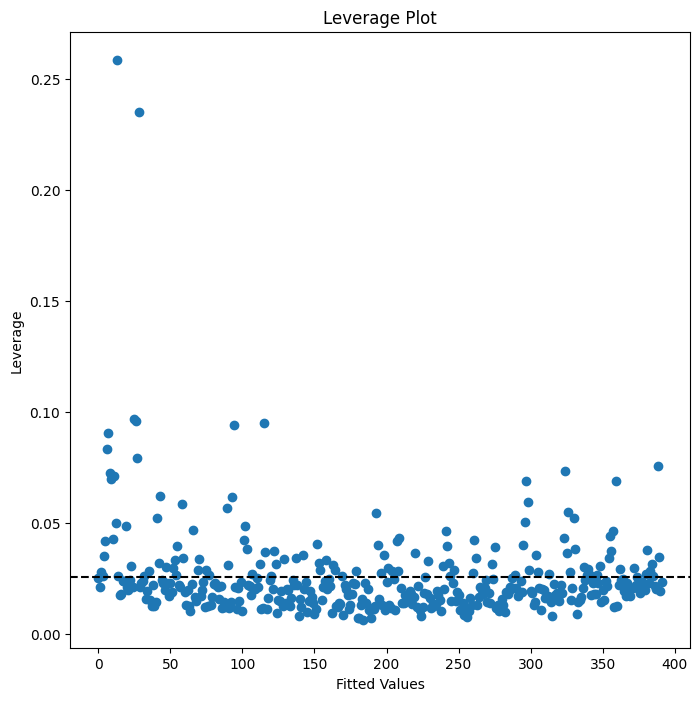

In [102]:
leverage = results.get_influence().hat_matrix_diag
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(Auto.shape[0]), leverage)
ax.axhline(np.mean(leverage), ls='--', c='k')
ax.set_title('Leverage Plot')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Leverage')
print(np.mean(leverage))
print('Observation number with unusually large leverage: ', np.argmax(leverage))

### 9e)
Fit model with two interaction terms `horsepower` and `weight`, and `horsepower` and `acceleration`.

We can see that the above interaction terms have a statistically significant relationship with the response.

In [101]:
model = smf.ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + horsepower:weight + horsepower:acceleration', data=Auto)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     274.3
Date:                Mon, 17 Jun 2024   Prob (F-statistic):          9.88e-161
Time:                        22:19:08   Log-Likelihood:                -967.25
No. Observations:                 392   AIC:                             1954.
Df Residuals:                     382   BIC:                             1994.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -7.6548      5.397     -1.418      0.157     -18.266       2.957
cylinders                   0.1963      0.292      0.673      0.501      -0.377       0.770
displacement               -0.0060      0.008     -0.798      0.426      -0.021       0.009
horsepower                 -0.1285      0.038     -3.394      0.001      -0.203      -0.054
weight                     -0.0093      0.001    -10.204      0.000      -0.011      -0.007
acceleration                0.3891      0.164      2.369      0.018       0.066       0.712
year                        0.7694      0.044     17.364      0.000       0.682       0.857
origin                      0.7206      0.250      2.882      0.004       0.229       1.212
horsepower:weight        4.752e-05   5.63e-06      8.448      0.000    3.65e-05    5.86e-05
horsepower:acceleration    -0.0061      0.002     -3.445      0.001      -0.010      -0.003
==============================================================================
Omnibus:                       31.166   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.495
Skew:                           0.489   Prob(JB):                     5.40e-13
Kurtosis:                       4.582   Cond. No.                     1.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 9f)
Now we will change back to a simple linear regression and apply the following transformations: $\log{X}$, $\sqrt{X}$, $X^2$.

We are looking at using `mpg` as the response and `horsepower` as the predictor.

In [109]:
model = smf.ols('mpg ~ np.log(horsepower)', data=Auto)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           1.70e-95
Time:                        22:27:23   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            108.6997      3.050     35.644      0.000     102.704     114.695
np.log(horsepower)   -18.5822      0.663    -28.034      0.000     -19.885     -17.279
==============================================================================
Omnibus:                       11.919   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.557
Skew:                           0.278   Prob(JB):                     0.000419
Kurtosis:                       3.803   Cond. No.                         64.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The log transformation looks like it is a pretty good fit with $R^2$ of 0.668

C:\Users\xavie\AppData\Local\Temp\ipykernel_99460\2599404841.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0,results.params[0]), slope=results.params[1], ls='--', c='r')


(3.828641396489095, 5.709983274369355)

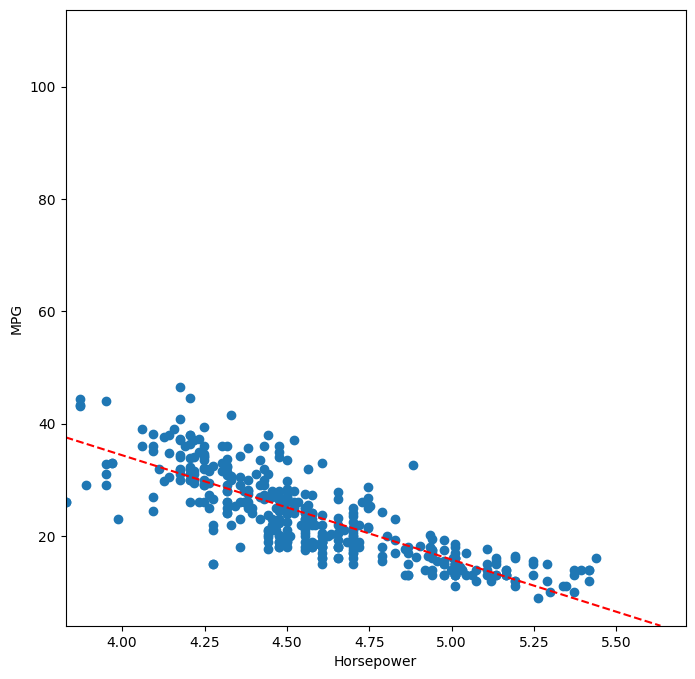

In [113]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.log(Auto['horsepower']), Auto['mpg'])
ax.axline((0,results.params[0]), slope=results.params[1], ls='--', c='r')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_xlim(np.log(min(Auto['horsepower'])))

In [114]:
model = smf.ols('mpg ~ np.sqrt(horsepower)', data=Auto)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     704.6
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           2.02e-89
Time:                        22:31:33   Log-Likelihood:                -1158.9
No. Observations:                 392   AIC:                             2322.
Df Residuals:                     390   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              58.7052      1.349     43.516      0.000      56.053      61.358
np.sqrt(horsepower)    -3.5035      0.132    -26.544      0.000      -3.763      -3.244
==============================================================================
Omnibus:                       12.446   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.121
Skew:                           0.384   Prob(JB):                      0.00142
Kurtosis:                       3.463   Cond. No.                         59.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The square root transformation looks like it is a pretty good fit with $R^2$ of 0.643

C:\Users\xavie\AppData\Local\Temp\ipykernel_99460\2884514542.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0,results.params[0]), slope=results.params[1], ls='--', c='r')


(6.782329983125268, 15.924038432508256)

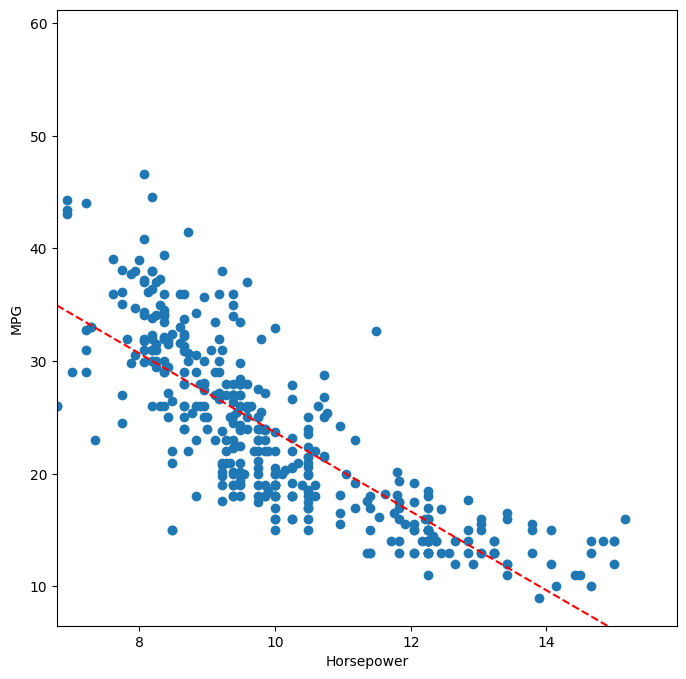

In [115]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.sqrt(Auto['horsepower']), Auto['mpg'])
ax.axline((0,results.params[0]), slope=results.params[1], ls='--', c='r')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_xlim(np.sqrt(min(Auto['horsepower'])))

In [117]:
model = smf.ols('mpg ~ np.power(horsepower, 2)', data=Auto)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     401.7
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           6.23e-62
Time:                        22:34:20   Log-Likelihood:                -1222.4
No. Observations:                 392   AIC:                             2449.
Df Residuals:                     390   BIC:                             2457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  30.4658      0.447     68.219      0.000      29.588      31.344
np.power(horsepower, 2)    -0.0006   2.83e-05    -20.042      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       25.973   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.455
Skew:                           0.666   Prob(JB):                     4.02e-07
Kurtosis:                       3.177   Cond. No.                     2.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The square transformation fit is worse than the other transformations with $R^2$ of 0.507

C:\Users\xavie\AppData\Local\Temp\ipykernel_99460\335992109.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0,results.params[0]), slope=results.params[1], ls='--', c='r')


(2116.0, 55545.0)

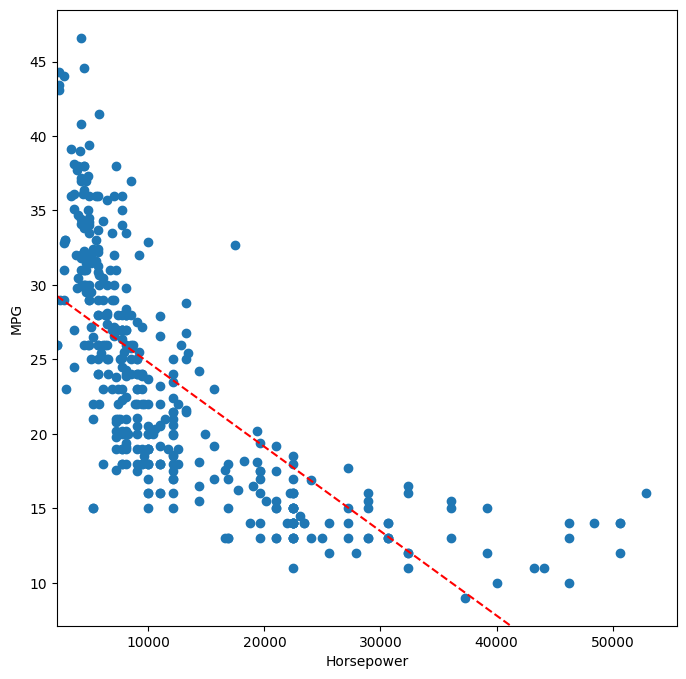

In [118]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.power(Auto['horsepower'], 2), Auto['mpg'])
ax.axline((0,results.params[0]), slope=results.params[1], ls='--', c='r')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_xlim(np.power(min(Auto['horsepower']), 2))